 # Análisis Exploratorio de Datos (EDA) The Multinational Revenue, Employment, and Investment Database 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


PREGUNTAS A RESPONDER
Algunas preguntas a responder con la solución visual construida:

● ¿Cuál es el top 10 países donde el ratio “Facturación por empleado” es más alto?

● ¿Cuál es el bottom 10 países donde el ratio “Facturación por empleado” es más 
bajo?

● ¿Cuáles son los 5 sectores con mejor evolución entre 2010 y 2021, en el número de 
nuevas empresas creadas en inversión doméstica en España?

● ¿Cuáles son los 5 sectores con peor evolución entre 2010 y 2021, en el número de 
nuevas empresas creadas en inversión internacional en España? (nuevas empresas 
con origen internacional y con destino España)

● /*Importe en € (EUROS), en el 2020 de la inversión extranjera en la Península Ibérica, 
en el sector “Finanzas y Seguros”.

● Importe en € (EUROS), en el 2015 del ratio “Facturación por empleado” en Italia, 
para el sector de “Bienes Raíces”

In [7]:
df=pd.read_csv('Mreid_conv.xlsx',sep=',')
df.tail()

,iso3_o,country_o,iso3_d,country_d,year,naics2,naics2description,extensive,greenfield,mergers,...,exchange_rate,OperatingrevenueTurnover{EUR},OperatingrevenueTurnover_green{EUR},OperatingrevenueTurnover_mergers{EUR},FixedassetsthEUR,FixedassetsthEUR_green,FixedassetsthEUR_mergers,TotalassetsthEUR,TotalassetsthEUR_green,TotalassetsthEUR_mergers
329538,ZWE,Zimbabwe,MUS,Mauritius,2021,99,Unclassified Establishments,1,0,0,...,0.84711,2415.999496,0.0,0.0,3676.335793,0.0,0.0,3.878558e+03,0.0,0.0
329539,ZWE,Zimbabwe,ZMB,Zambia,2021,31,Food and Textile Manufacturing,1,0,1,...,0.84711,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0
329540,ZWE,Zimbabwe,ZWE,Zimbabwe,2021,11,"Agriculture, Forestry, Fishing and Hunting",1,0,0,...,0.84711,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0
329541,ZWE,Zimbabwe,ZWE,Zimbabwe,2021,21,Oil and Gas Extraction,1,0,0,...,0.84711,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0
329542,ZWE,Zimbabwe,ZWE,Zimbabwe,2021,52,Finance and Insurance,4,0,0,...,0.84711,379383.154993,0.0,0.0,0.000000,0.0,0.0,1.907353e+06,0.0,0.0


In [8]:
top_10_operating_revenue = df.groupby('iso3_d')['OperatingrevenueTurnover'].sum().nlargest(10).reset_index()
top_10_operating_revenue

,iso3_d,OperatingrevenueTurnover
0,USA,4.863317e+10
1,GBR,4.254977e+10
2,JPN,3.589736e+10
3,CHN,3.290539e+10
4,FRA,2.548060e+10
5,DEU,2.202419e+10
6,SGP,1.469304e+10
7,ITA,1.234508e+10
8,ESP,1.212008e+10
9,NLD,1.054879e+10


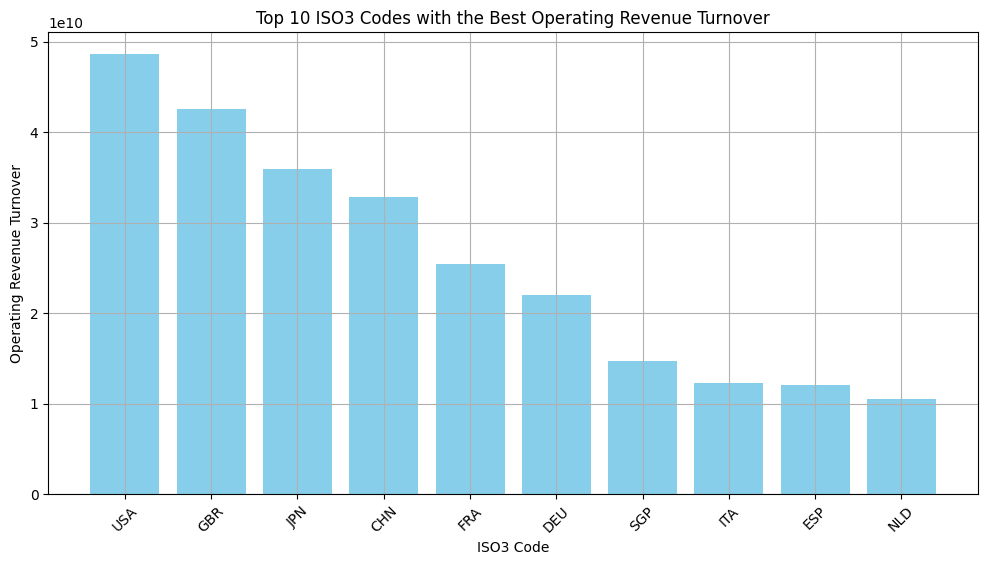

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_operating_revenue['iso3_d'], top_10_operating_revenue['OperatingrevenueTurnover'], color='skyblue')
plt.xlabel('ISO3 Code')
plt.ylabel('Operating Revenue Turnover')
plt.title('Top 10 ISO3 Codes with the Best Operating Revenue Turnover')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
top_10_operating_revenue_EUR = df.groupby('iso3_d')['OperatingrevenueTurnover{EUR}'].sum().nlargest(10).reset_index()
top_10_operating_revenue_EUR

,iso3_d,OperatingrevenueTurnover{EUR}
0,USA,4.100726e+10
1,GBR,3.566425e+10
2,JPN,3.042981e+10
3,CHN,2.810679e+10
4,FRA,2.144220e+10
5,DEU,1.857457e+10
6,SGP,1.242901e+10
7,ITA,1.038796e+10
8,ESP,1.019278e+10
9,NLD,8.870419e+09


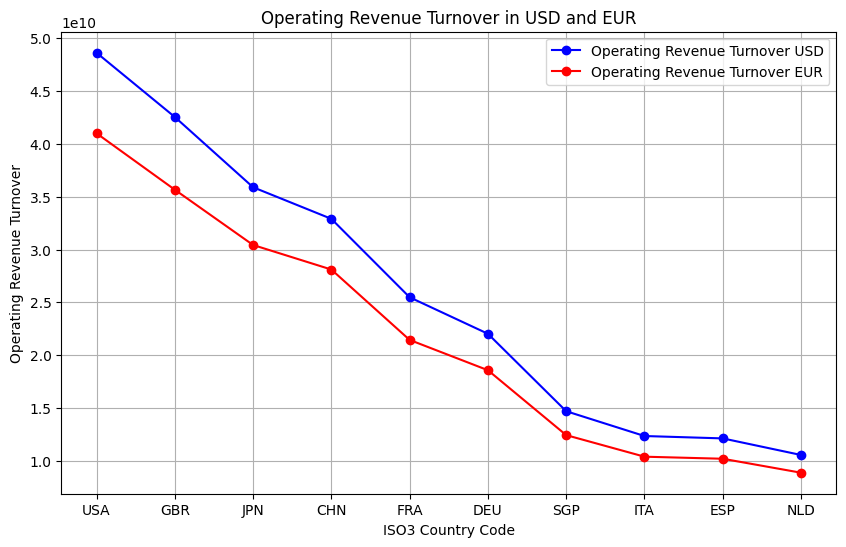

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_operating_revenue['iso3_d'], top_10_operating_revenue['OperatingrevenueTurnover'], marker='o', color='blue', label='Operating Revenue Turnover USD')
plt.plot(top_10_operating_revenue_EUR['iso3_d'], top_10_operating_revenue_EUR['OperatingrevenueTurnover{EUR}'], marker='o', color='red', label='Operating Revenue Turnover EUR')
plt.xlabel('ISO3 Country Code')
plt.ylabel('Operating Revenue Turnover')
plt.title('Operating Revenue Turnover in USD and EUR')
plt.legend()
plt.grid(True)
plt.show()

#the idea of this chart is later on we could predict the EUR by USD 

In [12]:
what_year = df.groupby('year')['OperatingrevenueTurnover'].sum().nlargest(10).reset_index()
what_year
#the 10 years with the highest summed operating revenue turnover
# so we ralize that 2019 was the best year for usa since 2010 to 2021 

,year,OperatingrevenueTurnover
0,2019,4.286277e+10
1,2018,4.268383e+10
2,2020,4.109029e+10
3,2017,3.868301e+10
4,2016,3.217903e+10
5,2014,3.193679e+10
6,2013,3.182720e+10
7,2015,3.079942e+10
8,2021,2.840148e+10
9,2012,2.812662e+10


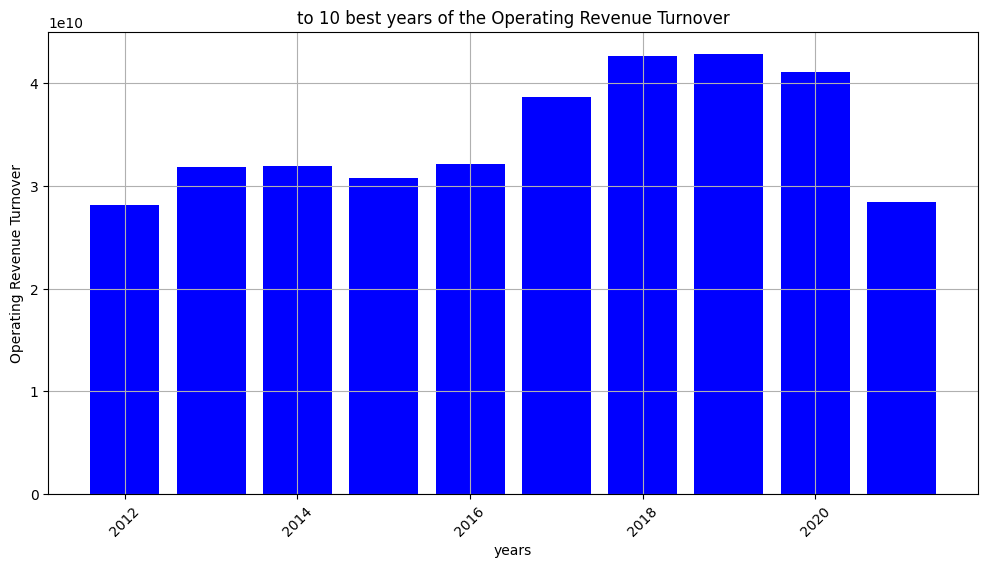

In [13]:
from matplotlib.cm import get_cmap
cmap = get_cmap('cool')

plt.figure(figsize=(12, 6))

plt.bar(what_year['year'], what_year['OperatingrevenueTurnover'], color='blue')
plt.xlabel('years')
plt.ylabel('Operating Revenue Turnover')
plt.title('to 10 best years of the Operating Revenue Turnover')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [14]:
bottom_years = df.groupby('year')['OperatingrevenueTurnover'].sum().nsmallest(10).reset_index()
bottom_years

,year,OperatingrevenueTurnover
0,2010,6.523061e+09
1,2011,1.655440e+10
2,2012,2.812662e+10
3,2021,2.840148e+10
4,2015,3.079942e+10
5,2013,3.182720e+10
6,2014,3.193679e+10
7,2016,3.217903e+10
8,2017,3.868301e+10
9,2020,4.109029e+10


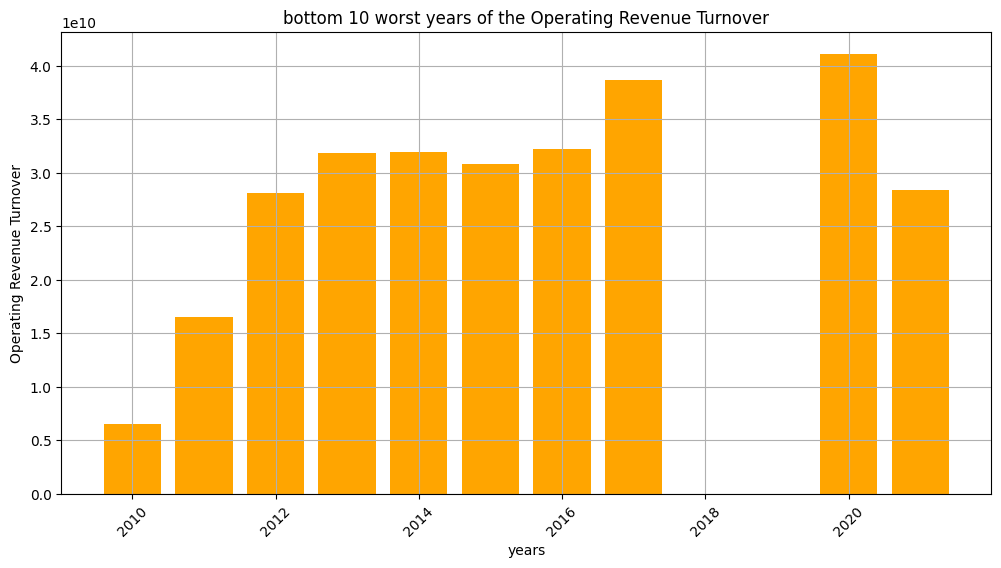

In [15]:
from matplotlib.cm import get_cmap
cmap = get_cmap('cool')

plt.figure(figsize=(12, 6))

plt.bar(bottom_years['year'], bottom_years['OperatingrevenueTurnover'], color='orange')
plt.xlabel('years')
plt.ylabel('Operating Revenue Turnover')
plt.title('bottom 10 worst years of the Operating Revenue Turnover')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
bottom_10_operating_revenue = df.groupby('iso3_d')['OperatingrevenueTurnover'].sum().nsmallest(10).reset_index()
bottom_10_operating_revenue 


,iso3_d,OperatingrevenueTurnover
0,CUB,483.018890
1,STP,1000.000000
2,GNB,11933.000000
3,BDI,16500.733887
4,SDN,20827.272705
5,GMB,32311.605469
6,MMR,36555.227463
7,AIA,56213.115356
8,ETH,100185.088722
9,MDV,104156.179657


In [17]:
bottom_years = df.groupby('year')['OperatingrevenueTurnover'].sum().nsmallest(10).reset_index()
bottom_years

,year,OperatingrevenueTurnover
0,2010,6.523061e+09
1,2011,1.655440e+10
2,2012,2.812662e+10
3,2021,2.840148e+10
4,2015,3.079942e+10
5,2013,3.182720e+10
6,2014,3.193679e+10
7,2016,3.217903e+10
8,2017,3.868301e+10
9,2020,4.109029e+10


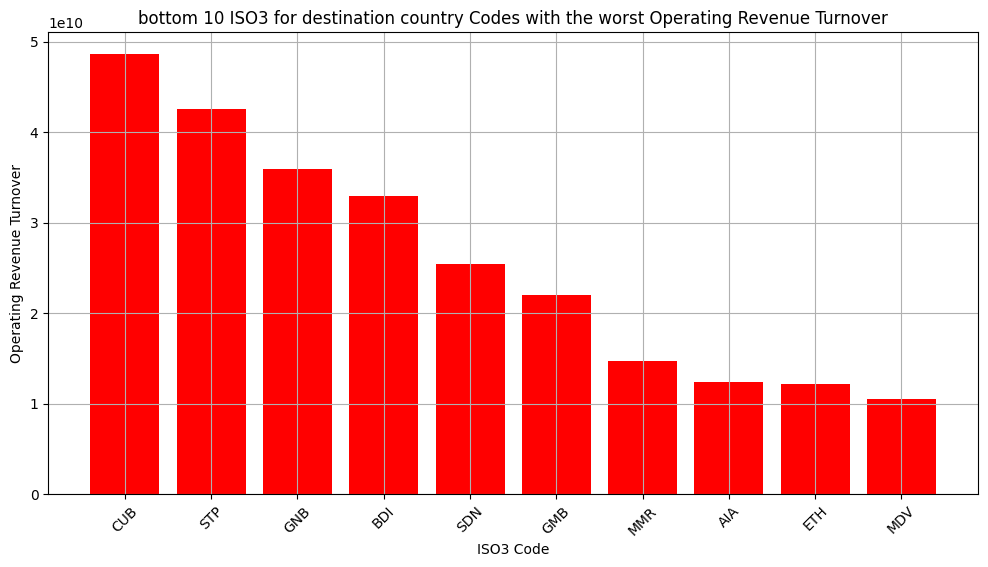

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_operating_revenue['iso3_d'], top_10_operating_revenue['OperatingrevenueTurnover'], color='red')
plt.xlabel('ISO3 Code')
plt.ylabel('Operating Revenue Turnover')
plt.title('bottom 10 ISO3 for destination country Codes with the worst Operating Revenue Turnover')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#very exponociel

In [33]:
bottom_10_operating_revenue_o= df.groupby('iso3_o')['OperatingrevenueTurnover'].sum().nsmallest(10).reset_index()
bottom_10_operating_revenue_o


,iso3_o,OperatingrevenueTurnover
0,ABW,0.000000
1,ETH,0.000000
2,LAO,0.000000
3,LSO,0.000000
4,MMR,0.000000
5,SLE,0.004639
6,SDN,0.515464
7,TKM,1.555851
8,NER,4.539462
9,MNG,3763.693420


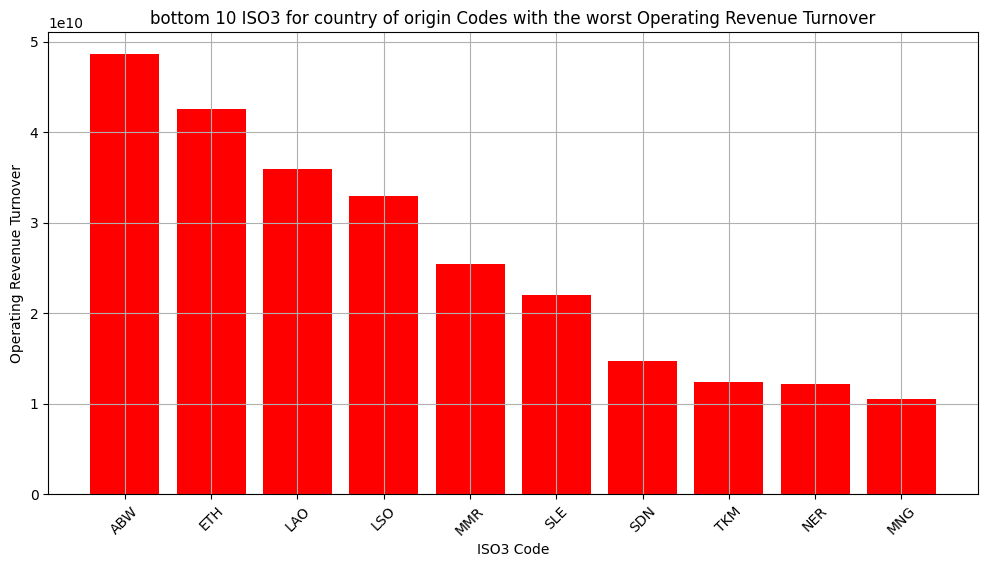

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_operating_revenue_o['iso3_o'], top_10_operating_revenue['OperatingrevenueTurnover'], color='red')
plt.xlabel('ISO3 Code')
plt.ylabel('Operating Revenue Turnover')
plt.title('bottom 10 ISO3 for country of origin Codes with the worst Operating Revenue Turnover')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

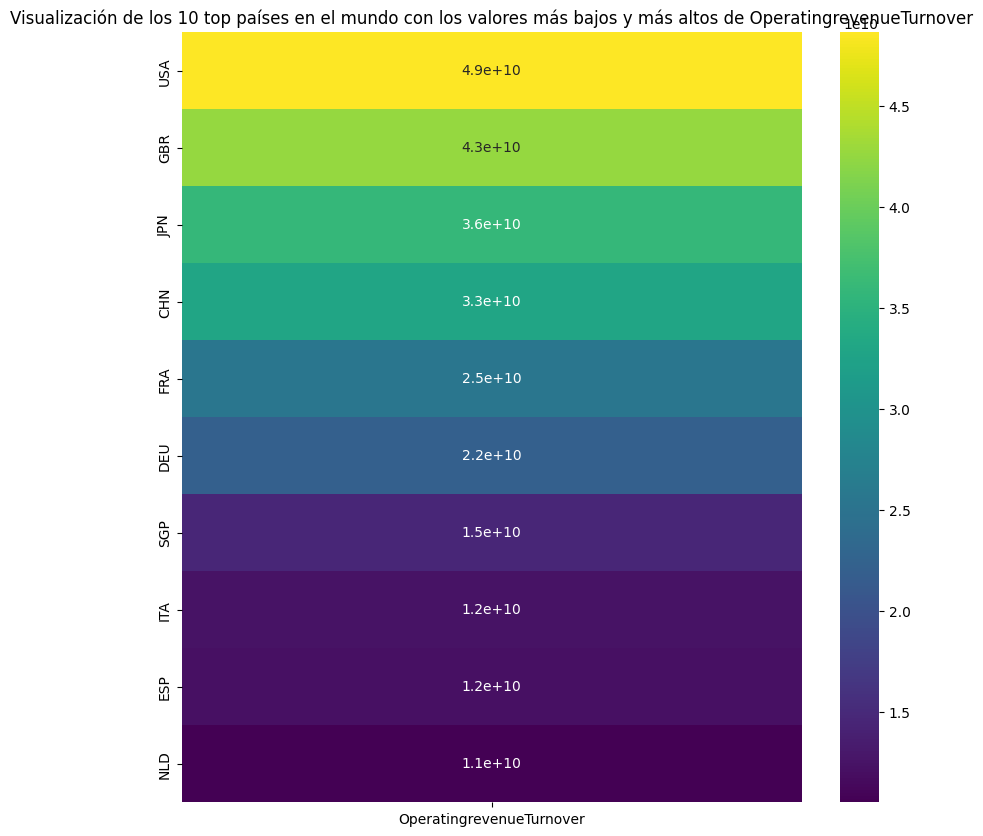

In [36]:


pivot_table = top_10_operating_revenue.pivot_table(index='iso3_d', values='OperatingrevenueTurnover', aggfunc='median')
pivot_table = pivot_table.sort_values(by='OperatingrevenueTurnover', ascending= False)  # Ordenar en orden descendente

plt.figure(figsize=(10, 10))
sns.heatmap(data=pivot_table, annot=True, cmap='viridis')
plt.title('Visualización de los 10 top países en el mundo con los valores más bajos y más altos de OperatingrevenueTurnover')
plt.xlabel('')
plt.ylabel('')

plt.show()



# EXTRA

In [22]:

#I was curious to see if the USA has a higher turnover than Japan in terms of country origins. This graph is primarily for curiosity and does not provide in-depth insights.


median_values = df.groupby('country_o')['OperatingrevenueTurnover'].median().sort_values(ascending=False).index

plt.figure(figsize=(100, 100))  
sns.boxplot(x='OperatingrevenueTurnover', y='country_o', data=df, order=median_values)
plt.title('OperatingrevenueTurnover por Orígenes (Ordenados por Mediana)')
plt.xlabel('OperatingrevenueTurnover')
plt.ylabel('country_o')
plt.show()
#decending 

In [23]:
Top_5_naisc = df.groupby('naics2description')['extensive'].sum().nlargest(5).reset_index()
Top_5_naisc

,naics2description,extensive
0,Unclassified Establishments,1290661
1,Wholesale Trade,1110713
2,Legal Services,1024598
3,Real Estate,1016813
4,Finished Product Manufacturing,752027


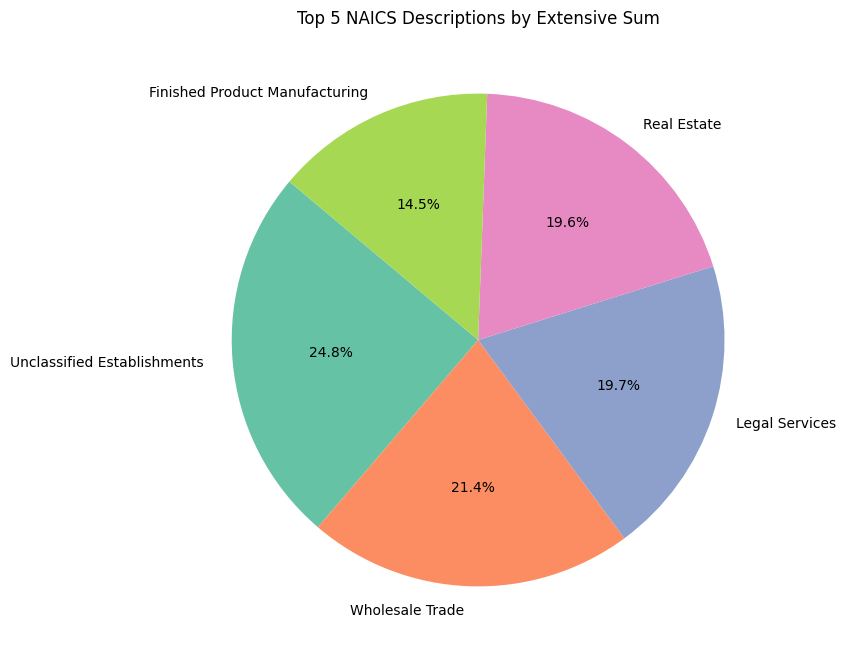

In [24]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

# Step 3: Plot these values in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(Top_5_naisc['extensive'], labels=Top_5_naisc['naics2description'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 NAICS Descriptions by Extensive Sum')
plt.show()

In [25]:
bottom_5_naisc = df.groupby('naics2description')['extensive'].sum().nsmallest(5).reset_index()
bottom_5_naisc

,naics2description,extensive
0,"Executive, Legislative, and Other General Gove...",32728
1,Postal Service,46733
2,Oil and Gas Extraction,88343
3,"Arts, Entertainment, and Recreation",105381
4,Miscellaneous Store Retailers,112362


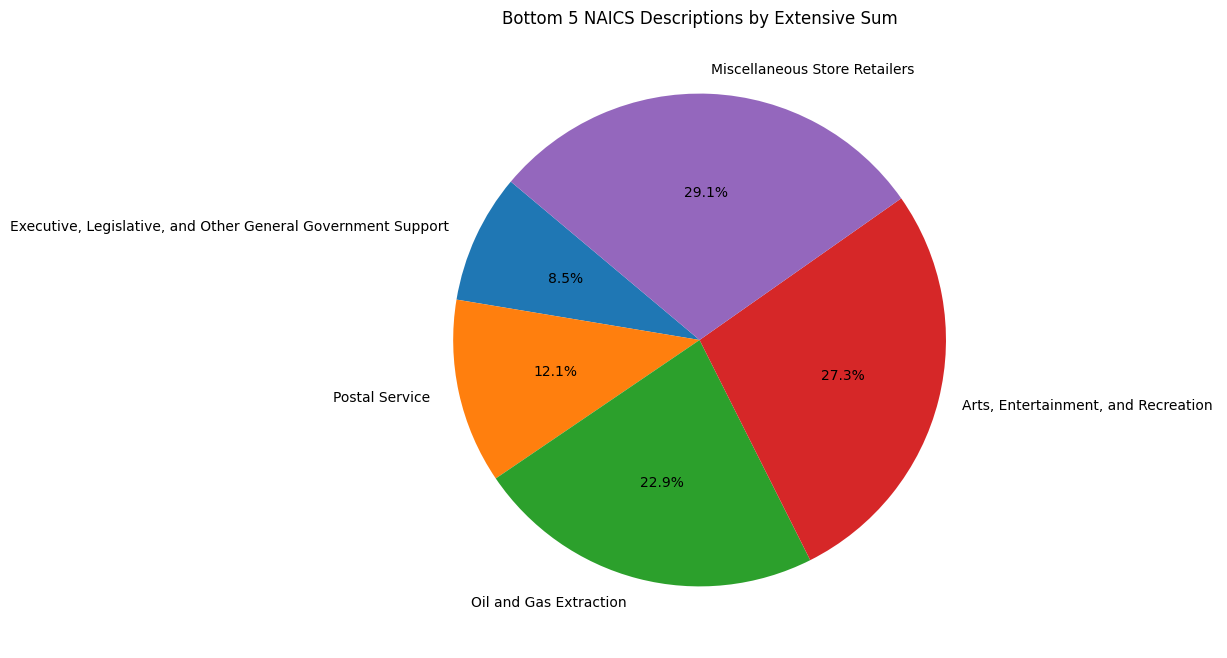

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(bottom_5_naisc['extensive'], labels=bottom_5_naisc['naics2description'], autopct='%1.1f%%', startangle=140)
plt.title('Bottom 5 NAICS Descriptions by Extensive Sum')
plt.show()

In [27]:
df.columns.tolist()

['iso3_o',
 'country_o',
 'iso3_d',
 'country_d',
 'year',
 'naics2',
 'naics2description',
 'extensive',
 'greenfield',
 'mergers',
 'OperatingrevenueTurnover',
 'OperatingrevenueTurnover_green',
 'OperatingrevenueTurnover_mergers',
 'TotalassetsthUSD',
 'TotalassetsthUSD_green',
 'TotalassetsthUSD_mergers',
 'Numberofemployees',
 'Numberofemployees_green',
 'Numberofemployees_mergers',
 'FixedassetsthUSD',
 'FixedassetsthUSD_green',
 'FixedassetsthUSD_mergers',
 'exchange_rate',
 'OperatingrevenueTurnover{EUR}',
 'OperatingrevenueTurnover_green{EUR}',
 'OperatingrevenueTurnover_mergers{EUR}',
 'FixedassetsthEUR',
 'FixedassetsthEUR_green',
 'FixedassetsthEUR_mergers',
 'TotalassetsthEUR',
 'TotalassetsthEUR_green',
 'TotalassetsthEUR_mergers']

In [37]:
df_periodo = df[(df['year'] >= 2010) & (df['year'] <= 2021) & (df['country_d'] == 'Spain')]
df_periodo

,iso3_o,country_o,iso3_d,country_d,year,naics2,naics2description,extensive,greenfield,mergers,...,exchange_rate,OperatingrevenueTurnover{EUR},OperatingrevenueTurnover_green{EUR},OperatingrevenueTurnover_mergers{EUR},FixedassetsthEUR,FixedassetsthEUR_green,FixedassetsthEUR_mergers,TotalassetsthEUR,TotalassetsthEUR_green,TotalassetsthEUR_mergers
52,AND,Andorra,ESP,Spain,2010,44,Food and Beverage Stores,1,0,0,...,0.77303,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
53,AND,Andorra,ESP,Spain,2010,52,Finance and Insurance,6,0,0,...,0.77303,717.853615,0.0,0.0,426.447539,0.0,0.0,963.048267,0.0,0.0
54,AND,Andorra,ESP,Spain,2010,53,Real Estate,1,0,0,...,0.77303,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
55,AND,Andorra,ESP,Spain,2010,54,Legal Services,1,0,0,...,0.77303,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
56,AND,Andorra,ESP,Spain,2010,55,Management of Companies and Enterprises,1,0,0,...,0.77303,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329280,ZAF,South Africa,ESP,Spain,2021,54,Legal Services,2,0,0,...,0.84711,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
329281,ZAF,South Africa,ESP,Spain,2021,55,Management of Companies and Enterprises,1,0,0,...,0.84711,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
329282,ZAF,South Africa,ESP,Spain,2021,56,Administrative and Support and Waste Managemen...,3,0,0,...,0.84711,22738.240200,0.0,0.0,15897.850593,0.0,0.0,31034.397055,0.0,0.0
329283,ZAF,South Africa,ESP,Spain,2021,61,Educational Services,1,0,0,...,0.84711,2569.644073,0.0,0.0,61.018121,0.0,0.0,1852.791712,0.0,0.0


In [60]:
#df_periodo['peores_sectores'] = df_periodo['greenfield'] + df_periodo['mergers']
#df_periodo.loc[:, 'peores_sectores'] = df_periodo['greenfield'] + df_periodo['mergers']

evolucion_sectores = df_periodo.groupby('naics2description')['peores_sectores'].agg(lambda x: x.iloc[-1] - x.iloc[0]).sort_values()

# Obtener los 5 sectores con peor evolución
peores_sectores = evolucion_sectores.head(5)
peores_sectores

C:\Users\1thea\AppData\Local\Temp\ipykernel_23996\2363748789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_periodo['peores_sectores'] = df_periodo['greenfield'] + df_periodo['mergers']


naics2description
Utilities                                                       -1
Executive, Legislative, and Other General Government Support    -1
Accommodation                                                    0
Management of Companies and Enterprises                          0
Legal Services                                                   0
Name: peores_sectores, dtype: int64

In [66]:

evolucion_sectores = df_periodo.groupby('naics2description')['peores_sectores'].agg(lambda x: x.iloc[-1] - x.iloc[0]).sort_values(ascending=False)
mejores_sectores = evolucion_sectores.head(5)
mejores_sectores


naics2description
Materials Manufacturing           12
Finished Product Manufacturing     9
Information                        4
Food and Textile Manufacturing     3
Wholesale Trade                    2
Name: peores_sectores, dtype: int64

In [63]:
# Filtrar los datos para el año 2020, el sector "Finanzas y Seguros" y la región Península Ibérica
inversion_finanzas_2020 = df[(df['year'] == 2020) & (df['naics2description'] == 'Finance and Insurance ') & (df['country_d'] == 'Spain')]

# Obtener el importe total de la inversión
importe_total_2020 = inversion_finanzas_2020['OperatingrevenueTurnover{EUR}'].sum()
print(f'Importe total en 2020 para el sector Finanzas y Seguros: {importe_total_2020} €')


Importe total en 2020 para el sector Finanzas y Seguros: 107999003.56675892 €


In [54]:
# Filtrar los datos para el año 2015, el sector "Real Estate" y el país Italia
facturacion_empleado_2015 = df[(df['year'] == 2015) & (df['naics2description'] == 'Real Estate ') & (df['country_d'] == 'Italy')]

# Calcular el ratio "Facturación por empleado"
facturacion_total = facturacion_empleado_2015['OperatingrevenueTurnover{EUR}'].sum()
numero_empleados = facturacion_empleado_2015['Numberofemployees'].sum()

# Evitar división por cero
if numero_empleados > 0:
    ratio_facturacion_empleado = facturacion_total / numero_empleados
else:
    ratio_facturacion_empleado = 0

print(f'Ratio Facturación por empleado en 2015 para el sector Real Estate en Italia: {ratio_facturacion_empleado} €')


Ratio Facturación por empleado en 2015 para el sector Real Estate en Italia: 717.3817387202547 €


In [28]:
pip install nbformat plotly


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached jupyter_core-5.7.2-py3-none-any.whl (28 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
  Attempting uninstall: jupyter-core
    Found existing installation: jupyter-core 4.11.1
Note: you may need to restart the kernel to use updated packages.


error: uninstall-no-record-file

× Cannot uninstall jupyter-core 4.11.1
╰─> The package's contents are unknown: no RECORD file was found for jupyter-core.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps jupyter-core==4.11.1


In [29]:
pip install --upgrade nbformat


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached jupyter_core-5.7.2-py3-none-any.whl (28 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
  Attempting uninstall: jupyter-core
    Found existing installation: jupyter-core 4.11.1
Note: you may need to restart the kernel to use updated packages.


error: uninstall-no-record-file

× Cannot uninstall jupyter-core 4.11.1
╰─> The package's contents are unknown: no RECORD file was found for jupyter-core.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps jupyter-core==4.11.1


In [30]:
#in order to the snakey diagram u must upgrate the kernerl 

""" pip install --upgrade pip
pip install --upgrade notebook
pip install --upgrade nbformat
pip install --upgrade ipython
pip install --upgrade pip
 """

' pip install --upgrade pip\npip install --upgrade notebook\npip install --upgrade nbformat\npip install --upgrade ipython\npip install --upgrade pip\n '

In [31]:
""" import plotly.graph_objects as go

node_labels = df['iso3_d']
source_indices = df['Numberofemployees']  # example source indices
target_indices = df['Numberofemployees_green']  # example target indices
values =df ['Numberofemployees_mergers']  # example values

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    ))])

fig.update_layout(title_text="Sankey Diagram Example", font_size=10)
fig.show()
 """

' import plotly.graph_objects as go\n\nnode_labels = df[\'iso3_d\']\nsource_indices = df[\'Numberofemployees\']  # example source indices\ntarget_indices = df[\'Numberofemployees_green\']  # example target indices\nvalues =df [\'Numberofemployees_mergers\']  # example values\n\nfig = go.Figure(data=[go.Sankey(\n    node=dict(\n        pad=15,\n        thickness=20,\n        line=dict(color="black", width=0.5),\n        label=node_labels\n    ),\n    link=dict(\n        source=source_indices,\n        target=target_indices,\n        value=values\n    ))])\n\nfig.update_layout(title_text="Sankey Diagram Example", font_size=10)\nfig.show()\n '

FUTUR_LINES: Ideas

Predict the Future of the Euro: Analyze the future trends of the Euro currency based on its current financial status and its correlation with the USD, given their interrelated nature.

Forecast Africa's Development: Project the future economic trajectory of Africa and compare it to the current markets of America and Europe. Estimate the number of years it might take for Africa to achieve a level of development comparable to that of the United States and europe 

Assess Japan and China: Examine the future economic prospects for Japan and China, considering their current positions and potential growth trajectories.

